In [239]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
daily = pd.read_csv("Data/daily.csv")

In [3]:
hourly = pd.read_csv("Data/hourly.csv")

In [4]:
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
daily.shape

(731, 16)

In [7]:
hourly.shape

(17379, 17)

In [8]:
daily.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
hourly.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
daily.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
daily.yr.unique()

array([0, 1], dtype=int64)

In [167]:
X = pd.DataFrame(daily,columns=[ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])
Y = pd.DataFrame(daily,columns=[ 'cnt'])

# To find the best columns that have best performance on the target column "cnt" i used Random 

C:\Users\kimid\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.04696962 0.01872739 0.10520716 0.00550531 0.09809969 0.01849224
 0.04894465 0.16257718 0.16716145 0.16262177 0.16569353]


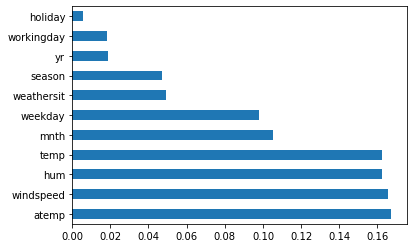

season        0.046970
yr            0.018727
mnth          0.105207
holiday       0.005505
weekday       0.098100
workingday    0.018492
weathersit    0.048945
temp          0.162577
atemp         0.167161
hum           0.162622
windspeed     0.165694
dtype: float64


In [168]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')

plt.show()
print(feat_importance)

# Linear Regression on Daily Dataset.

In [273]:
d_y = pd.DataFrame(daily,columns=["cnt"])


In [294]:
d_x = pd.DataFrame(daily,columns=['mnth','weekday','temp', 'atemp',"hum","windspeed"])


In [295]:
x_train_d,x_test_d,y_train_d,y_test_d = train_test_split(d_x,d_y, test_size=0.2,random_state=1)



In [296]:
x_test_d.shape

(147, 6)

In [297]:
lm = LinearRegression()  

lm_daily = lm.fit(x_train_d, y_train_d)

In [298]:
pred_daily = lm.predict(x_test_d)



In [299]:
lm.score(x_train_d,y_train_d)


0.48249690468392314

In [300]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_d, pred_daily))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_d, pred_daily))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_d, pred_daily)))

Mean Absolute Error: 1127.7440956125538
Mean Squared Error: 1863316.6889596719
Root Mean Squared Error: 1365.0335852863373


### Our model with columns 'season','weekday','temp', 'atemp',"hum","windspeed" predicted 50% on "cnt". 

In [282]:
d_x1 = pd.DataFrame(daily,columns=['temp', 'atemp'])


In [283]:
x_train_d,x_test_d,y_train_d,y_test_d = train_test_split(d_x1,d_y, test_size=0.2,random_state=1)

In [ ]:
poly

In [284]:
lm_daily1 = lm.fit(x_train_d, y_train_d)

In [285]:
pred_daily1 = lm.predict(x_test_d)

In [286]:
lm.score(x_train_d,y_train_d)

0.36630067206255923

In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_d, pred_daily1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_d, pred_daily1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_d, pred_daily1)))

Mean Absolute Error: 1117.8481683418925
Mean Squared Error: 1855853.1219204746
Root Mean Squared Error: 1362.2970020962664


### Model with "Temp" and "aTemp" is 36%  so this not a good model.

# Random Forest

In [458]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [535]:
hourly = pd.read_csv("Data/hourly.csv")

In [536]:
def onehot_encode(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(hourly)
columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for column in columns:
    X = onehot_encode(X, column)

onehot encoding.

In [537]:
for column in columns:
    del X[column]

In [538]:
y = X['cnt']
X=X.drop(columns=['cnt'])
X=X.drop(columns=['casual'])
X=X.drop(columns=['registered'])

dropped 3 columns.

In [539]:
X = X.drop(columns=['instant'])
X = X.drop(columns=['dteday'])

In [540]:
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [541]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [542]:
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test) 

In [543]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

31.175541840192157

In [544]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.9216312745397193

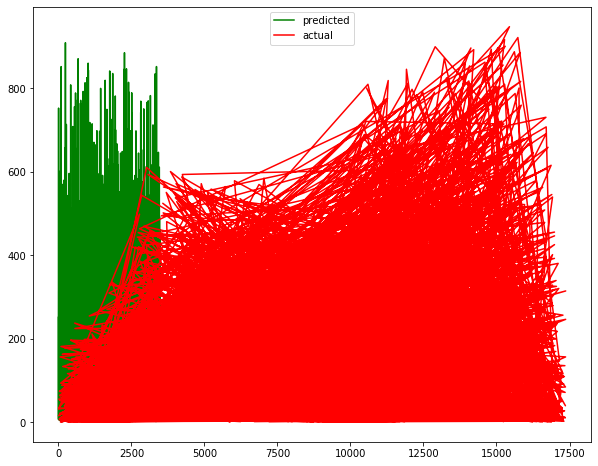

In [550]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, label='predicted',color='green')
plt.plot(y_test, label='actual',color='red')

plt.legend()
plt.show()

# Polynomial LinearRegression

In [522]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



y=daily["cnt"]
x=daily.drop(columns=['cnt','dteday','casual','registered'])

In [526]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)


In [527]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [528]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

405.5771871231817
0.9561077848654264
